In [1]:
#load packages
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import soundfile as sf


In [2]:
#import data 
path = 'x:/Steering/Recordings/Processed/'
data, fs = sf.read(path + 'ERB=2.wav')
classes = pd.read_csv(path + 'Classes_2.csv')


In [3]:
# front left and front right as predictors
X = data[:len(data)-1,0*18:1*18] 
Y = classes.values[:,0] - 1

In [4]:
#split into training and test set
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.2,random_state=0)

In [5]:
onehot_encoded_train = keras.utils.to_categorical(trainY)
onehot_encoded_test = keras.utils.to_categorical(testY)

In [6]:
onehot_encoded_test

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [7]:
onehot_encoded_train 


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [8]:
#DC removal 
trainX -= (np.mean(trainX, axis=0) + 1e-8)
testX -= (np.mean(testX, axis=0) + 1e-8)

In [9]:
clf = keras.Sequential()
opt = keras.optimizers.Adam(lr=0.05)

In [10]:
onehot_encoded_train.shape[1], X.shape[1],onehot_encoded_train


(5, 18, array([[0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]], dtype=float32))

In [11]:

clf.add(keras.layers.Dense(
  units = 12,
  input_dim = trainX.shape[1], 
  activation = 'tanh'
))

clf.add(keras.layers.Dropout(0.2))

clf.add(keras.layers.Dense(
    units = onehot_encoded_train.shape[1],      
    input_dim = 12,
    activation = 'softmax'
))

#kernel_regularizer = keras.regularizers.l2(0.001),


In [12]:
onehot_encoded_train.shape[1], trainX.shape

(5, (848016, 18))

In [13]:
clf.compile(loss='mean_squared_error',
    optimizer=opt,
           metrics=['categorical_accuracy'])

In [14]:
history = clf.fit(trainX,onehot_encoded_train,
                 batch_size = 100, epochs = 20,
                 verbose = 1,
                 validation_split = 0.2)

Train on 678412 samples, validate on 169604 samples
Epoch 1/20
678412/678412 [==============================] - 9s 13us/step - loss: 0.1484 - categorical_accuracy: 0.3877 - val_loss: 0.1471 - val_categorical_accuracy: 0.3972
Epoch 2/20
678412/678412 [==============================] - 8s 12us/step - loss: 0.1473 - categorical_accuracy: 0.4058 - val_loss: 0.1464 - val_categorical_accuracy: 0.4091
Epoch 3/20
678412/678412 [==============================] - 7s 11us/step - loss: 0.1469 - categorical_accuracy: 0.4091 - val_loss: 0.1463 - val_categorical_accuracy: 0.4273
Epoch 4/20
678412/678412 [==============================] - 7s 11us/step - loss: 0.1459 - categorical_accuracy: 0.4016 - val_loss: 0.1388 - val_categorical_accuracy: 0.4269
Epoch 5/20
678412/678412 [==============================] - 7s 11us/step - loss: 0.1403 - categorical_accuracy: 0.4037 - val_loss: 0.1339 - val_categorical_accuracy: 0.4664
Epoch 6/20
678412/678412 [==============================] - 7s 11us/step - loss: 0.

In [15]:
clf.predict_classes(testX[1:100,:]) + 1,testY[1:100]

(array([2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 5, 4, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 3, 2, 2, 3, 2, 5, 2, 2, 3, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 5, 2, 2, 2, 2, 2, 3, 5, 2, 5, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5], dtype=int64),
 array([3, 3, 2, 2, 1, 0, 3, 1, 4, 2, 3, 1, 2, 1, 4, 3, 1, 0, 4, 1, 3, 1,
        1, 1, 1, 3, 0, 3, 4, 3, 2, 4, 3, 3, 1, 3, 2, 2, 2, 3, 0, 1, 1, 1,
        0, 3, 1, 2, 4, 4, 3, 1, 1, 3, 1, 2, 4, 0, 3, 2, 0, 4, 1, 4, 2, 3,
        1, 3, 3, 1, 0, 3, 3, 3, 3, 1, 2, 3, 1, 0, 1, 1, 4, 2, 3, 4, 1, 3,
        0, 1, 3, 3, 1, 0, 3, 3, 4, 3, 3], dtype=int64))

In [16]:
clf.evaluate(testX,onehot_encoded_test,verbose=1)

212005/212005 [==============================] - 2s 8us/step


[0.13109747550971992, 0.46541355156746117]

In [17]:
# saving the model 
# save model and weights
#clf_json = clf.to_json()
#with open("NN_18-12-5.json", "w") as json_file:
 #   json_file.write(clf_json)
    
#clf.save_weights("NN_18-12-5_weights.h5")

In [18]:
#np.save('TestX_NN_18-12-5',testX), np.save('TestY_NN_18-12-5',testY),
#np.save('OneHot_testY_18-12-5',onehot_encoded_test)

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_categorical_accuracy'])
plt.plot(history.history['categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.axis([0, 20, 0.3, 1])
plt.legend(['Validation', 'Training'], loc='upper left')
plt.savefig('Accuracy_left_ERB=2.png',dpi=100)

In [20]:
#saving weights
weights_first_layer = clf.layers[0].get_weights()[0]
biases_first_layer = clf.layers[0].get_weights()[1]

weights_second_layer = clf.layers[2].get_weights()[0]
biases_second_layer = clf.layers[2].get_weights()[1]


weights_first_layer = np.vstack([biases_first_layer, weights_first_layer])
weights_second_layer = np.vstack([biases_second_layer, weights_second_layer])


weights_first_layer_norm = weights_first_layer / abs(weights_first_layer).max()
#biases_first_layer_norm = biases_first_layer / abs(biases_first_layer).max()

weights_second_layer_norm = weights_second_layer / abs(weights_second_layer).max()
#biases_second_layer_norm = biases_second_layer / abs(biases_second_layer).max()


weights_first_layer_norm.shape, weights_second_layer_norm.shape

abs(weights_first_layer).max(), abs(weights_second_layer).max()

np.savetxt('weights_first_layer_norm_NN_18-12-5.txt',weights_first_layer_norm,delimiter= ',')
np.savetxt('weights_second_layer_norm_NN_18-12-5.txt',weights_second_layer_norm,delimiter= ',')


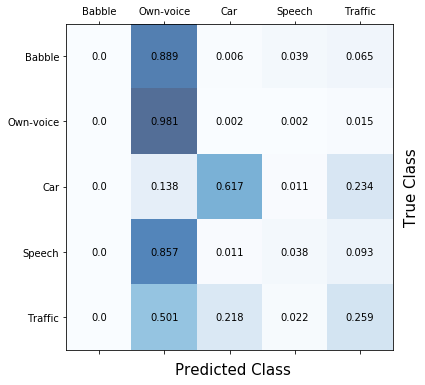

In [21]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cfm = confusion_matrix(testY,clf.predict_classes(testX)) 

a = [0 for x in range(5)]
cfm_norm = np.zeros((5,5))#[[0 for x in range(5)] for y in range(5)]

for idx in range(5):
    cfm_norm[idx,:] = cfm[idx,:] / sum(cfm[idx,:]) #len(testY[testY == idx + 1])      

cfm_norm = np.around(cfm_norm,decimals=3)

#nicer confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center', ha= 'center')

ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_xticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.set_yticklabels(['Babble','Own-voice','Car','Speech','Traffic'])
ax.yaxis.set_label_coords(1.08,0.5)
ax.xaxis.set_label_coords(0.51,-0.04)
ax.set_xlabel('Predicted Class',fontsize=15)
ax.set_ylabel('True Class',fontsize=15)
fig.savefig('Conf_Matrix_left_ERB=2.png',dpi=100)


In [22]:
FP = cfm_norm.sum(axis=0) - np.diag(cfm_norm)  
FN = cfm_norm.sum(axis=1) - np.diag(cfm_norm)
TP = np.diag(cfm_norm)
TN = cfm_norm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

ACC.mean(),TPR.mean(), FPR.mean()

(0.7516606642657063, 0.3790076076076076, 0.15522668811274856)